<a href="https://colab.research.google.com/github/josejulianhidayat/Data_Mining/blob/main/SegmentasiPenjualanTiapNegara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA MINING STUDI KASUS PENJUALAN TIAP NEGARA
**TUTORIAL BY JOSE JULIAN HIDAYAT**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis penjualan per negara/kategori

In [10]:
# Load file Excel
file_path = "Global_Superstore2.xlsx"
data = pd.read_excel(file_path)

In [11]:
# Lihat 5 baris pertama
print(data.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [12]:
# Informasi umum tentang kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [13]:
# Statistik dasar untuk kolom numerik
print(data.describe())

            Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
m

In [15]:
print(data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [17]:
#Cek beberapa baris awal
print(data[['Country', 'Category', 'Sales']].head())

         Country    Category     Sales
0  United States  Technology  2309.650
1      Australia   Furniture  3709.395
2      Australia  Technology  5175.171
3        Germany  Technology  2892.510
4        Senegal  Technology  2832.960


In [19]:
#Agregasi penjualan berdasarkan Negara dan Kategori
sales_summary = data.groupby(['Country', 'Category'])['Sales'].sum().reset_index()

In [22]:
# Urutkan berdasarkan total penjualan (opsional, biar rapi)
sales_summary = sales_summary.sort_values(by='Sales', ascending=False)

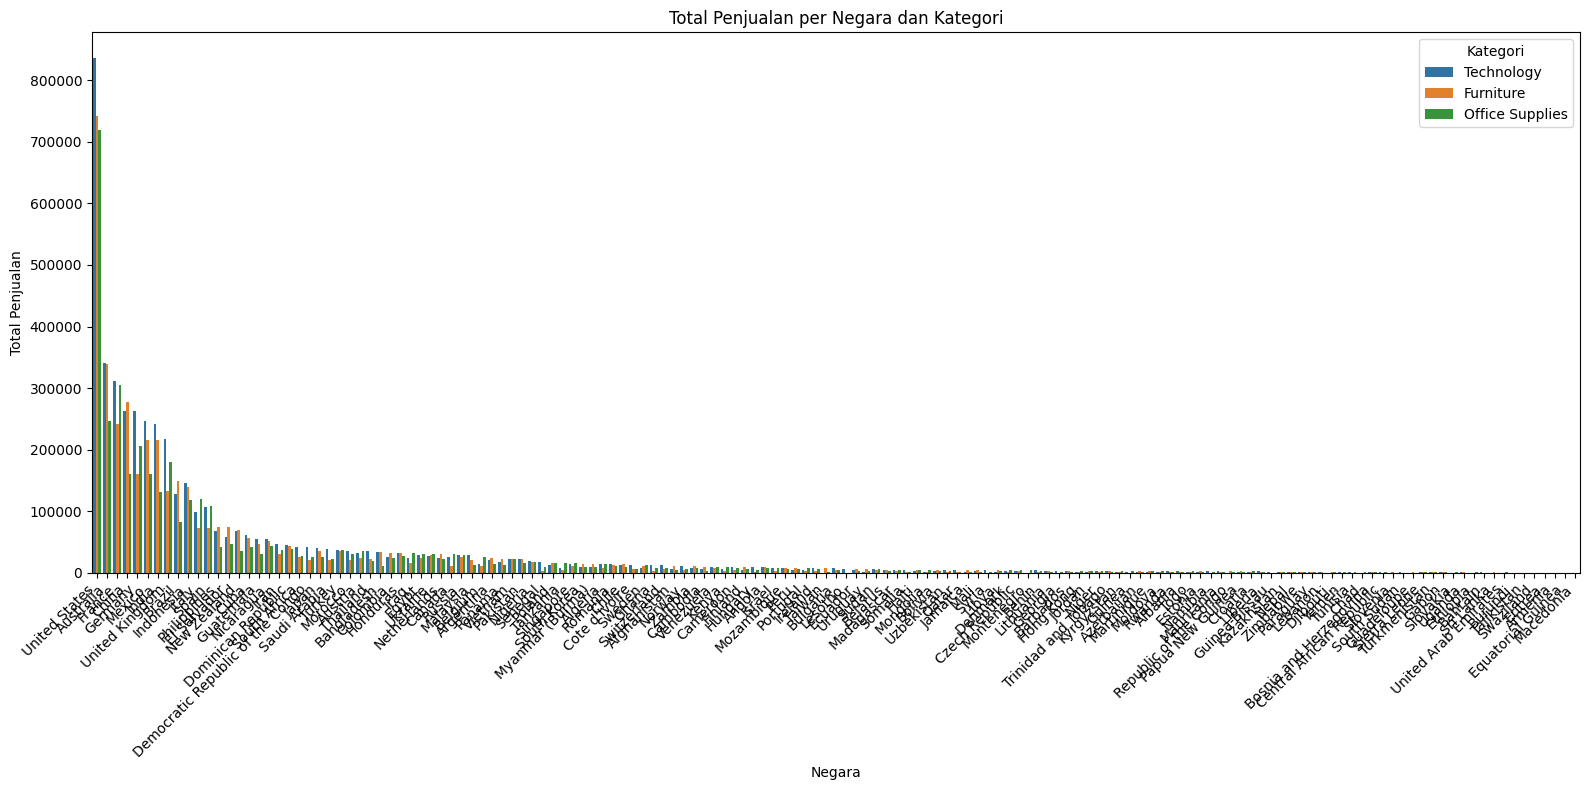

In [23]:
# Plot diagram batang
plt.figure(figsize=(16, 8))
sns.barplot(data=sales_summary, x='Country', y='Sales', hue='Category')
plt.title('Total Penjualan per Negara dan Kategori')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Penjualan')
plt.xlabel('Negara')
plt.tight_layout()
plt.legend(title='Kategori')
plt.show()

In [25]:
#MERAPIHKAN
# 1. Hitung total penjualan per negara
top_countries = data.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).index

# 2. Filter hanya data dari negara-negara tersebut
filtered_df = data[data['Country'].isin(top_countries)]

In [26]:
# 3. Hitung total penjualan per negara dan kategori
sales_summary = filtered_df.groupby(['Country', 'Category'])['Sales'].sum().reset_index()

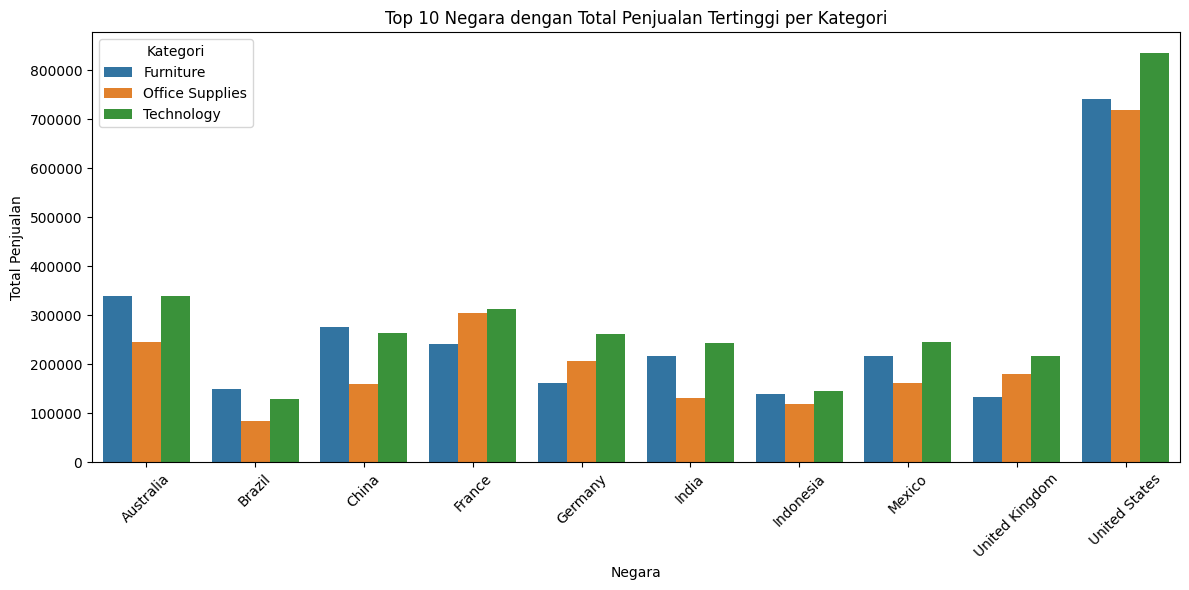

In [27]:
# 4. Plot diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary, x='Country', y='Sales', hue='Category')
plt.title('Top 10 Negara dengan Total Penjualan Tertinggi per Kategori')
plt.ylabel('Total Penjualan')
plt.xlabel('Negara')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Kategori')
plt.show()

In [29]:
# Hitung total penjualan per kategori
category_sales = data.groupby('Category')['Sales'].sum()

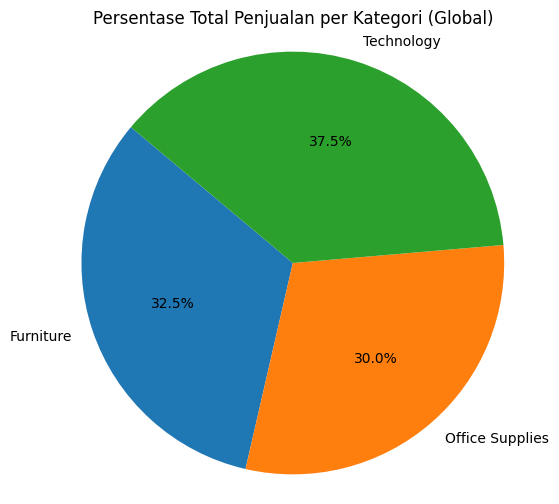

In [30]:
# Plot diagram pie
plt.figure(figsize=(6, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Total Penjualan per Kategori (Global)')
plt.axis('equal')  # Biar bentuknya lingkaran sempurna
plt.show()

In [33]:
country_sales = data.groupby('Country')['Sales'].sum().sort_values(ascending=False)

In [34]:
# Ambil Top 10 negara
top_10 = country_sales.head(10)
others = country_sales[10:].sum()

In [35]:
# Gabungkan ke satu dataframe baru
combined = top_10.copy()
combined['Lainnya'] = others

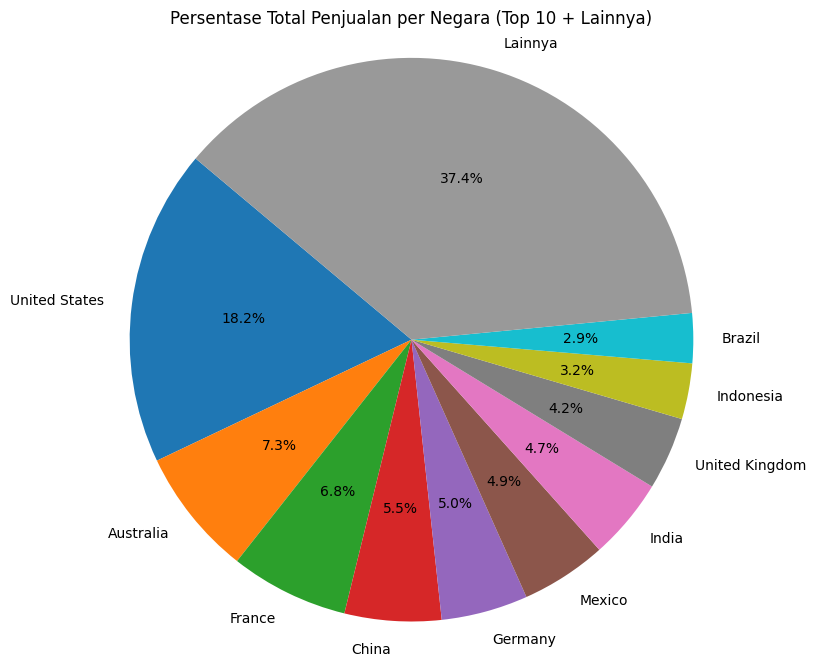

In [37]:
# Tentukan warna: 10 warna berbeda + 1 warna abu-abu untuk "Lainnya"
colors = sns.color_palette("tab10", 10) + [(0.6, 0.6, 0.6)]  # abu-abu RGB

# Plot
plt.figure(figsize=(8, 8))
plt.pie(combined, labels=combined.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Total Penjualan per Negara (Top 10 + Lainnya)')
plt.axis('equal')
plt.show()

# Segmentasi customer berdasarkan pembelian

Mengelompokkan customer berdasarkan perilaku pembelian mereka, misalnya:

1. Siapa yang paling sering belanja?

2. Siapa yang paling banyak belanja?

3. Siapa yang belanjanya jarang tapi sekali beli langsung besar?

Kita bisa pakai teknik RFM Analysis untuk ini.

RFM: Recency, Frequency, Monetary

1. Recency (R): Kapan terakhir kali customer melakukan pembelian?

2. Frequency (F): Berapa kali customer melakukan pembelian?

3. Monetary (M): Berapa total uang yang dihabiskan?

In [38]:
import pandas as pd
import datetime as dt

In [39]:
# Load data
df = pd.read_excel("Global_Superstore2.xlsx")

In [41]:
# Pastikan format tanggal
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [42]:
# Set tanggal acuan untuk Recency (misalnya hari terakhir transaksi di dataset)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

In [43]:
# Group by customer
rfm = df.groupby('Customer Name').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                   # Frequency
    'Sales': 'sum'                                           # Monetary
}).reset_index()

In [44]:
# Rename kolom
rfm.columns = ['Customer Name', 'Recency', 'Frequency', 'Monetary']

# Lihat hasil awal
print(rfm.head())

     Customer Name  Recency  Frequency     Monetary
0    Aaron Bergman       17         37  24644.62750
1    Aaron Hawkins       13         34  20759.51384
2   Aaron Smayling       24         31  14212.62840
3  Adam Bellavance       36         41  20186.77840
4        Adam Hart        3         42  21718.20142


**Segmentasi Berdasarkan Skor (Opsional Lanjut)**

In [45]:
# Skoring (semakin rendah Recency, semakin bagus)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Gabungkan skor ke segmen
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# Lihat hasil akhir
print(rfm.sort_values('RFM_Score', ascending=False).head())


        Customer Name  Recency  Frequency     Monetary R_Score F_Score  \
793  Zuschuss Carroll        4         38  28479.99226       5       5   
741  Theone Pippenger        3         43  23959.02628       5       5   
451   Laura Armstrong        2         46  27862.44190       5       5   
508    Matthew Clasen        6         38  21808.79670       5       5   
487     Maria Etezadi        6         40  26247.21700       5       5   

    M_Score RFM_Segment  RFM_Score  
793       5         555         15  
741       5         555         15  
451       5         555         15  
508       5         555         15  
487       5         555         15  


**ViauLIAai Scatter Plot: Frequency vs Monetary**

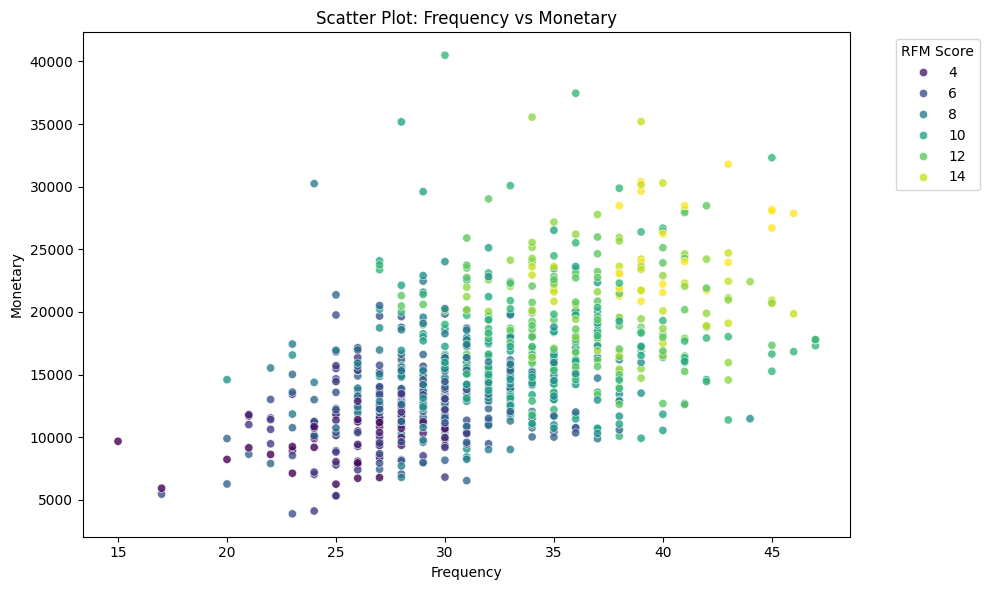

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='RFM_Score', palette='viridis', alpha=0.8)
plt.title('Scatter Plot: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Visualisasi Bar Chart: Jumlah Customer per Segment (RFM Score Grouping)**

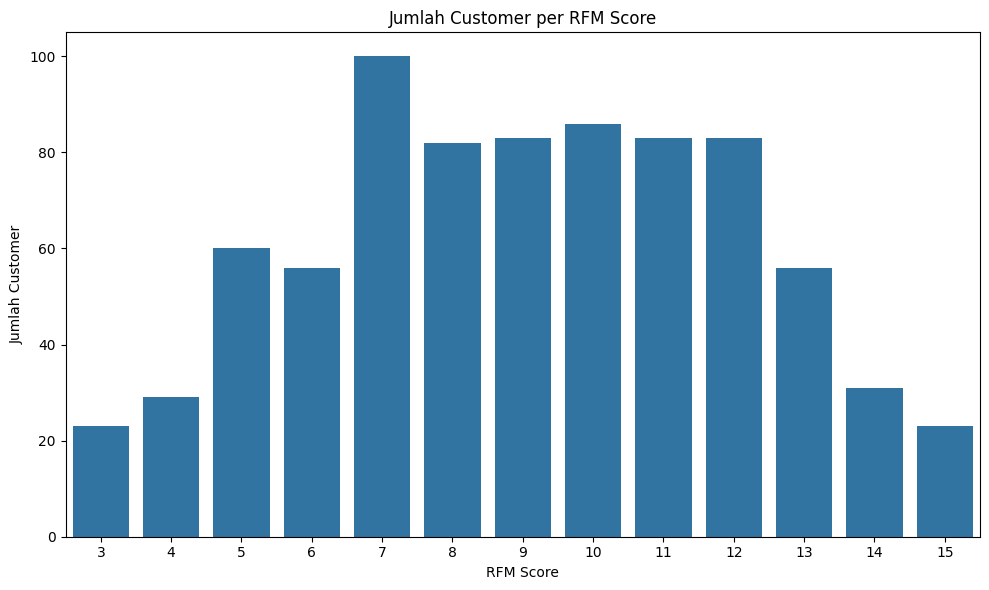

In [47]:
#Kelompokkan skor total RFM (R+F+M) untuk lihat distribusi pelanggan:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='RFM_Score', order=sorted(rfm['RFM_Score'].unique()))
plt.title('Jumlah Customer per RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Jumlah Customer')
plt.tight_layout()
plt.show()


**Heatmap Kombinasi R dan F Skor**

<ipython-input-48-b9c1db8532e0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_Score', 'F_Score']).size().unstack()


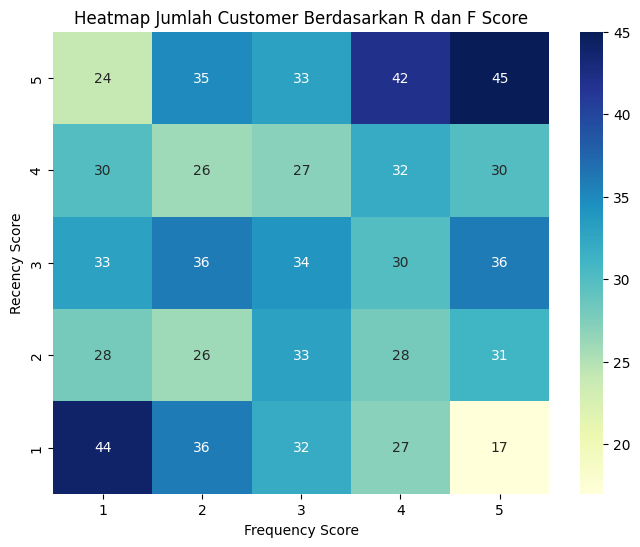

In [48]:
# Hitung jumlah customer untuk setiap kombinasi R & F
rfm_heatmap = rfm.groupby(['R_Score', 'F_Score']).size().unstack()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap Jumlah Customer Berdasarkan R dan F Score')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


In [49]:
def assign_segment(score):
    if score >= 12:
        return 'Best Customers'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'At Risk'
    else:
        return 'Hibernating'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

# Lihat contoh hasil
print(rfm[['Customer Name', 'RFM_Score', 'Segment']].head())


     Customer Name  RFM_Score         Segment
0    Aaron Bergman         12  Best Customers
1    Aaron Hawkins         12  Best Customers
2   Aaron Smayling          7         At Risk
3  Adam Bellavance         12  Best Customers
4        Adam Hart         15  Best Customers


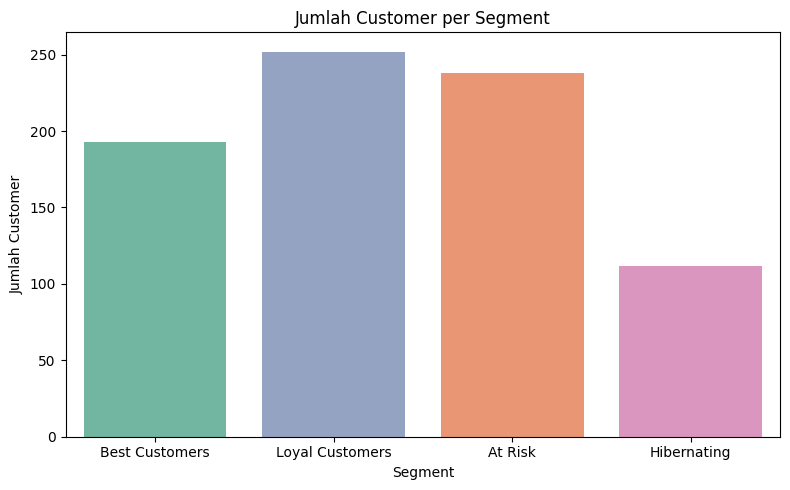

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=rfm,
    x='Segment',
    hue='Segment',
    order=['Best Customers', 'Loyal Customers', 'At Risk', 'Hibernating'],
    palette='Set2',
    legend=False
)
plt.title('Jumlah Customer per Segment')
plt.xlabel('Segment')
plt.ylabel('Jumlah Customer')
plt.tight_layout()
plt.show()
